In [1]:
import os
import pandas as pd
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from tqdm import tqdm
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import clipboard
import base64
from io import BytesIO
from PIL import Image
from proxyattention.meta_utils import read_pickle


/home/eragon/mambaforge/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
!ls runs

baseline_run_26032023_124800  baseline_run_26032023_213720
baseline_run_26032023_132227  baseline_run_26032023_214436
baseline_run_26032023_133425  baseline_run_26032023_215855
baseline_run_26032023_134035  baseline_run_26032023_221132
baseline_run_26032023_135310  baseline_run_26032023_222823
baseline_run_26032023_140007  baseline_run_26032023_223511
baseline_run_26032023_190957  baseline_run_26032023_224024
baseline_run_26032023_193040  baseline_run_26032023_224412
baseline_run_26032023_193143  baseline_run_26032023_225527
baseline_run_26032023_193345  baseline_run_26032023_225818
baseline_run_26032023_193627  baseline_run_26032023_231355
baseline_run_26032023_193757  baseline_run_26032023_232253
baseline_run_26032023_193957  baseline_run_26032023_235532
baseline_run_26032023_201014  baseline_run_27032023_102427
baseline_run_26032023_201940  baseline_run_27032023_102541
baseline_run_26032023_202022  baseline_run_27032023_105652
baseline_run_26032023_202059  baseline_run_27032023_1113

In [8]:
!python result_aggregator.py

  0%|                                                    | 0/26 [00:00<?, ?it/s]runs/baseline_run_26032023_201014/events.out.tfevents.1679854215.eragon
Source path:... /run/media/eragon/HDD/CODE/Github/improving_robotics_datasets/src/result_aggregator.py
Starting var:.. event_acc = <tensorboard.backend.event_processing.event_accumulator.EventAccumulator object at 0x7f19c8357850>
Starting var:.. save_ims = False
13:57:10.709877 call        42 def process_event_acc(event_acc, save_ims = False):
13:57:10.710110 line        44     all_tags = event_acc.Tags()
New var:....... all_tags = {'images': [], 'audio': [], 'histograms': [], 's...: False, 'meta_graph': False, 'run_metadata': []}
13:57:10.710150 line        45     temp_dict = {}
New var:....... temp_dict = {}
13:57:10.710192 line        46     for tag in all_tags.keys():
New var:....... tag = 'images'
13:57:10.710229 line        47         if tag == "scalars":
13:57:10.710263 line        59         if tag == "tensors":
13:57:10.710291 

In [9]:
combined_df = read_pickle(fname = "./results/aggregated_runs.csv")[0]


In [10]:
combined_df["global_run_count"]

0     20
1     20
2     20
3     20
4     20
5     20
6     20
7     20
8     20
9     20
10    20
11    20
12    20
13    20
14    20
15    20
16    20
17    20
18    20
19    20
20    20
21    20
22    20
23    20
24    20
25    20
Name: global_run_count, dtype: object

In [6]:
broken_runs = combined_df[combined_df["global_run_count"] != "20"]["index"].values
len(broken_runs)

1

In [7]:
# Delete broken runs
[Path.unlink(Path(x)) for x in broken_runs]

[None]

In [11]:
combined_df.head()

index proxy_step Loss/Train  \
0  runs/baseline_run_26032023_124800/events.out.t...      False    0.00103   
1  runs/baseline_run_26032023_132227/events.out.t...      False   0.000502   
2  runs/baseline_run_26032023_133425/events.out.t...      False   0.000079   
3  runs/baseline_run_26032023_134035/events.out.t...      False   0.000007   
4  runs/baseline_run_26032023_135310/events.out.t...      False   0.000112   

   Acc/Train global_run_count  Loss/Val    Acc/Val experiment_name image_size  \
0      99.43               20  0.046147  65.949997    baseline_run        224   
1  99.459999               20  0.024097      63.66    baseline_run        224   
2  99.912529               20  0.007058  88.954506    baseline_run        224   
3      100.0               20  0.000001      100.0    baseline_run        224   
4  99.873283               20  0.003803  93.409378    baseline_run        224   

  batch_size  ...                                       name_fn  \
0         32  ...  <function get_parent_name at 0x7faec51aba30>   
1         64  ...  <function get_parent_name at 0x7f005b9cfa30>   
2         64  ...  <function get_parent_name at 0x7f7acff7ba30>   
3         64  ...  <function get_parent_name at 0x7f92835bfa30>   
4         64  ...  <function get_parent_name at 0x7fd873f9fa30>   

                                              writer  \
0  <tensorboardX.writer.SummaryWriter object at 0...   
1  <tensorboardX.writer.SummaryWriter object at 0...   
2  <tensorboardX.writer.SummaryWriter object at 0...   
3  <tensorboardX.writer.SummaryWriter object at 0...   
4  <tensorboardX.writer.SummaryWriter object at 0...   

                                           label_map  \
0  {0: 'apple', 1: 'aquarium_fish', 2: 'baby', 3:...   
1  {0: 'n02085620-Chihuahua', 1: 'n02085782-Japan...   
2  {0: 'BACKGROUND_Google', 1: 'Faces', 2: 'Faces...   
3  {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F...   
4  {0: 'n01440764', 1: 'n02102040', 2: 'n02979186...   

                                       rev_label_map num_classes  \
0  {'apple': 0, 'aquarium_fish': 1, 'baby': 2, 'b...         100   
1  {'n02085620-Chihuahua': 0, 'n02085782-Japanese...         120   
2  {'BACKGROUND_Google': 0, 'Faces': 1, 'Faces_ea...         102   
3  {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': ...          20   
4  {'n01440764': 0, 'n02102040': 1, 'n02979186': ...          10   

                    dataset_sizes           criterion  \
0  {'train': 10000, 'val': 10000}  CrossEntropyLoss()   
1  {'train': 10000, 'val': 10000}  CrossEntropyLoss()   
2    {'train': 4573, 'val': 4572}  CrossEntropyLoss()   
3  {'train': 10000, 'val': 10000}  CrossEntropyLoss()   
4    {'train': 4735, 'val': 4734}  CrossEntropyLoss()   

                                                 cam  \
0  <pytorch_grad_cam.grad_cam_plusplus.GradCAMPlu...   
1  <pytorch_grad_cam.grad_cam_plusplus.GradCAMPlu...   
2  <pytorch_grad_cam.grad_cam_plusplus.GradCAMPlu...   
3  <pytorch_grad_cam.grad_cam_plusplus.GradCAMPlu...   
4  <pytorch_grad_cam.grad_cam_plusplus.GradCAMPlu...   

                                           save_path          final_acc  
0  /run/media/eragon/HDD/CODE/Github/improving_ro...              65.95  
1  /run/media/eragon/HDD/CODE/Github/improving_ro...              63.66  
2  /run/media/eragon/HDD/CODE/Github/improving_ro...  88.95450568678915  
3  /run/media/eragon/HDD/CODE/Github/improving_ro...              100.0  
4  /run/media/eragon/HDD/CODE/Github/improving_ro...  93.40937896070976  

[5 rows x 39 columns]

In [12]:
combined_df.shape

(26, 39)

In [23]:
combined_df[combined_df["global_run_count"]!= "0"]["proxy_steps"].value_counts()

[20]    16
Name: proxy_steps, dtype: int64

# Image code

In [24]:
filtered_df = combined_df[(~pd.isnull(combined_df['converted_proxy'])) & (~pd.isnull(combined_df['original_images']))]

KeyError: 'converted_proxy'

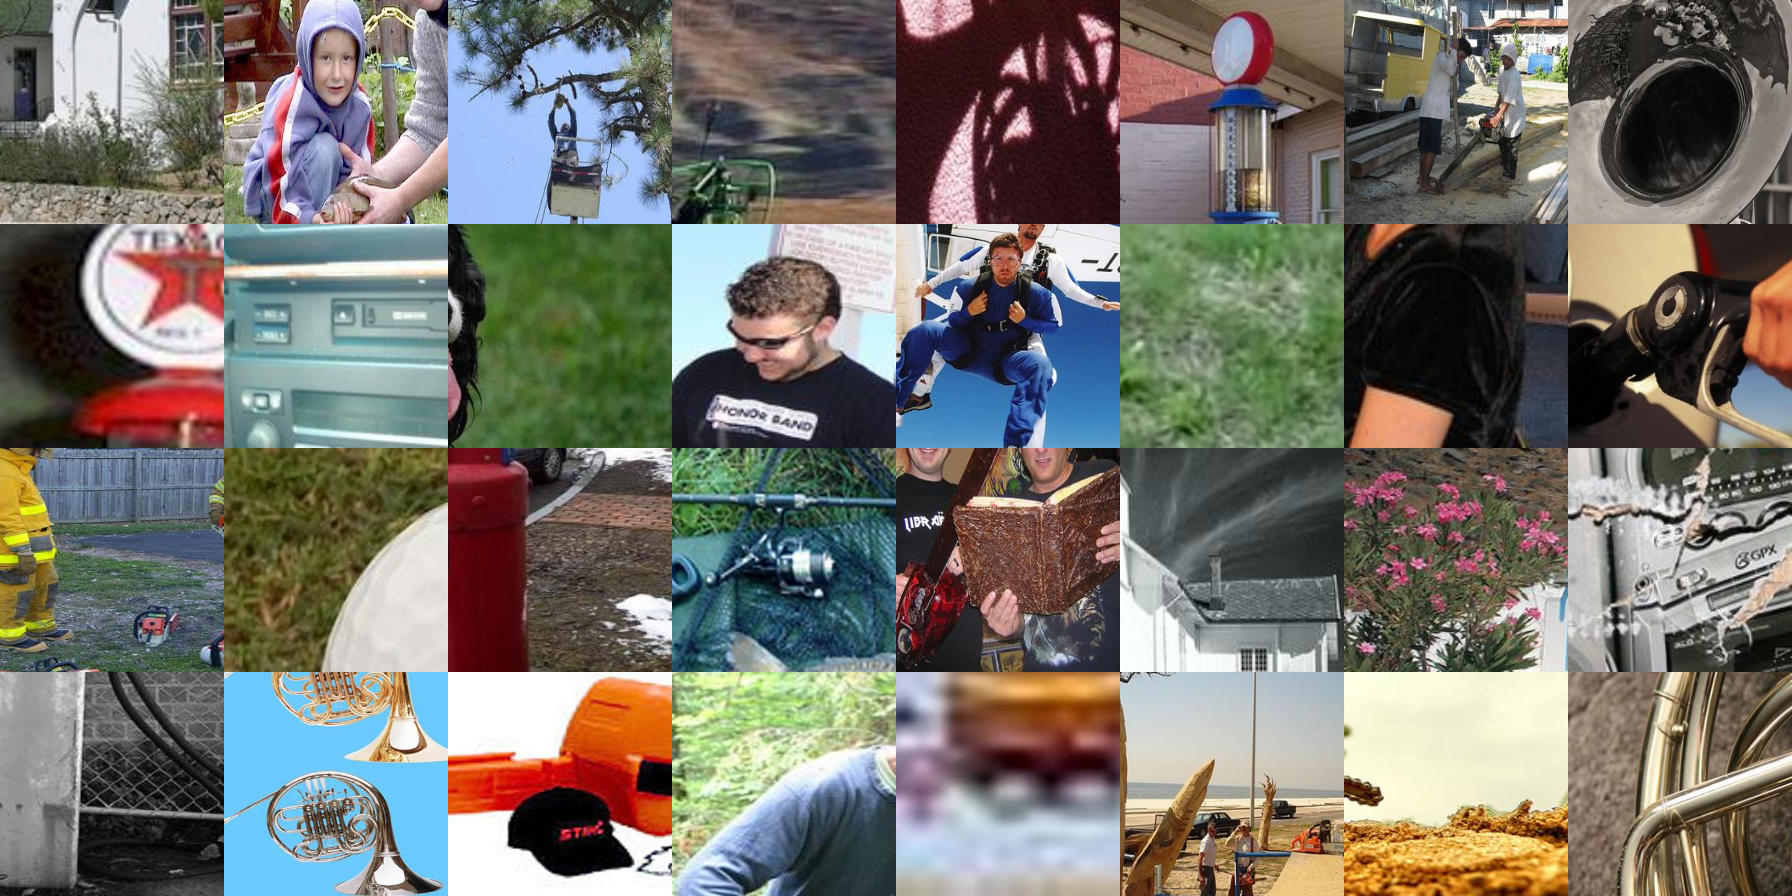

In [11]:
filtered_df.iloc[1].original_images

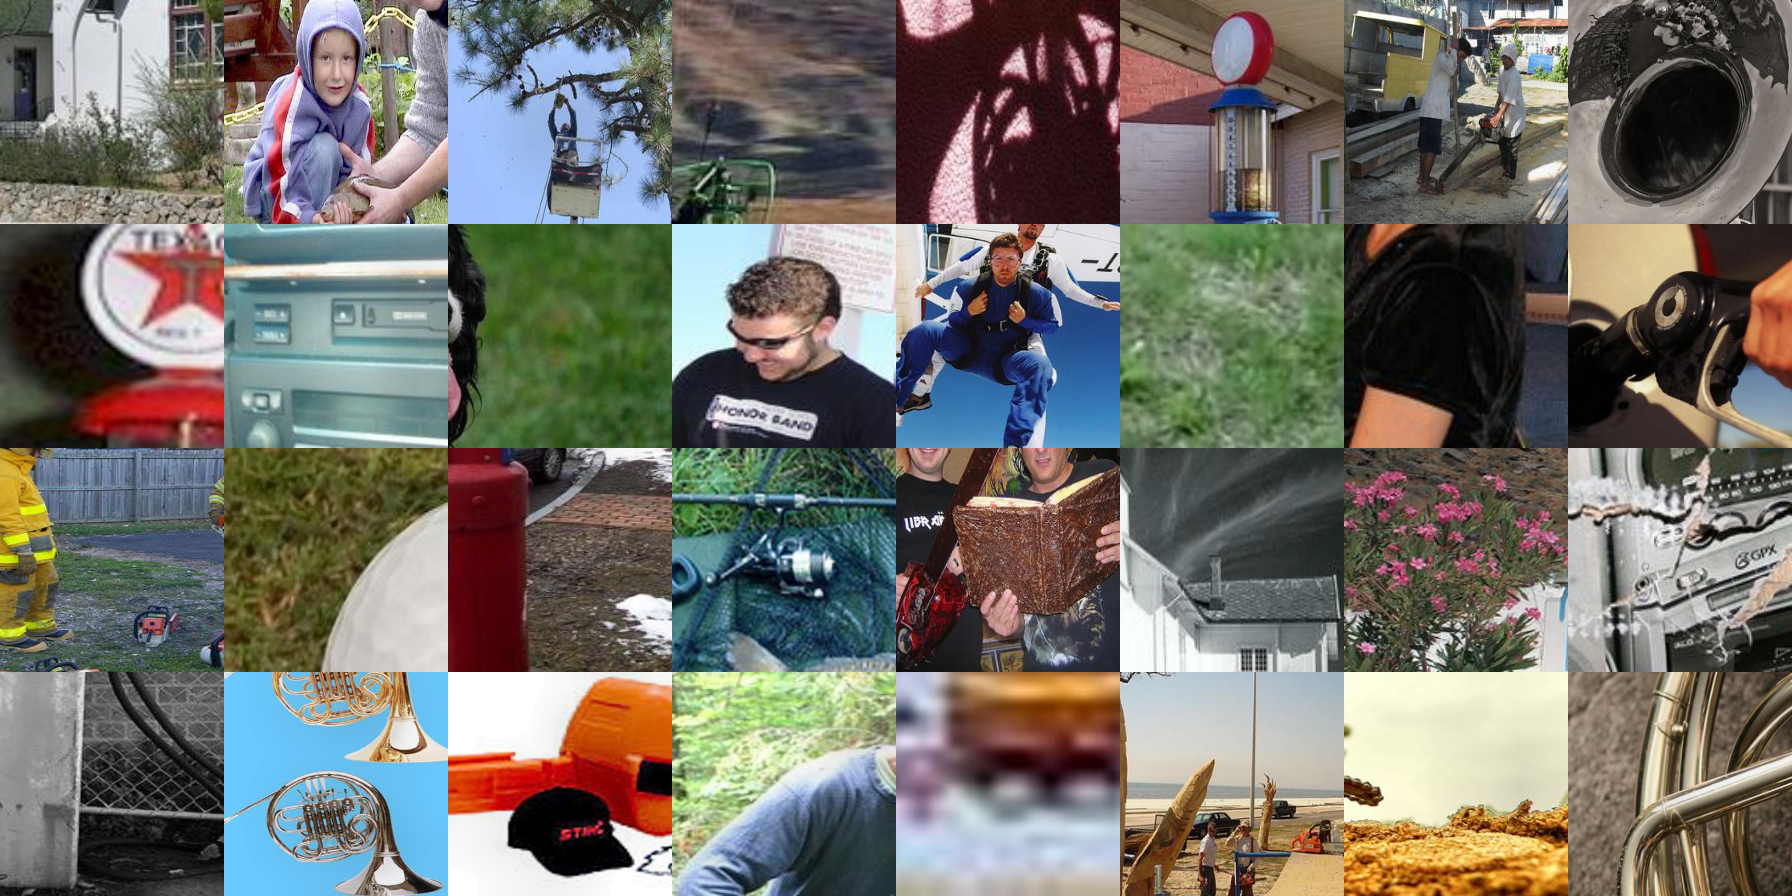

In [12]:
filtered_df.iloc[1].converted_proxy

# Preprocess

In [13]:
def check_proxy(string): return "p" in string

In [14]:
def calc_stats(values):
    return f"min: {values.min()} \nmax: {values.max()} \navg: {values.mean()}"

In [15]:
def convert_float(df, cols, totype= float):
    for col in cols:
        df[col] = df[col].astype(totype)

In [16]:
combined_df = combined_df.fillna(0)
# col to check for proxy
# combined_df["has_proxy"] = combined_df["proxy_steps"].apply(check_proxy)
# Fix naming
combined_df = combined_df.rename(columns={"Acc/Val":"accuracy", "proxy_steps":"step_schedule"})
# Fix types
convert_float(combined_df, ["change_subset_attention", "proxy_threshold", "accuracy"], float)
convert_float(combined_df, ["global_run_count"], int)
convert_float(combined_df, ["transfer_imagenet"], bool)

# ignore failed runs
# combined_df = combined_df[combined_df["global_run_count"]!=0]


# Grouped Results

In [17]:
def return_grouped_results(df, group_cols ,filter = None, index_cols = (["ds_name", ("accuracy")]), print_latex = False):
    if filter != None:
        df = df.reset_index()
        for key in filter.keys():
            df = df[df[key] == filter[key]]
    final_df = pd.DataFrame(df.groupby(group_cols, as_index=True).mean(numeric_only = True)["accuracy"]).sort_values(index_cols, ascending=False)
    if print_latex == True:
        clipboard.copy(final_df.to_latex())

    return final_df



In [18]:
return_grouped_results(combined_df, ["ds_name","model"])

accuracy
ds_name    model                           
imagenette resnet50               94.190956
           resnet18               93.409378
           efficientnet_b0        88.001686
           vit_base_patch16_224   39.543728
           vgg16                  10.318969
dogs       efficientnet_b0        71.519997
           resnet50               66.629997
           resnet18               63.660000
           vgg16                  15.650000
           vit_base_patch16_224   10.950000
cifar100   efficientnet_b0        73.320000
           resnet18               65.949997
           resnet50               63.660000
           vit_base_patch16_224   13.120000
           vgg16                   1.040000
caltech101 efficientnet_b0        92.454071
           resnet18               88.954506
           resnet50               85.454941
           vgg16                  45.100613
           vit_base_patch16_224   32.874016
asl        resnet18              100.000000
           efficientnet_b0        99.510002
           resnet50               98.589996
           vit_base_patch16_224   14.090000
           vgg16                   5.070000

In [30]:
return_grouped_results(combined_df, ["ds_name", "pixel_replacement_method", "transfer_imagenet", "gradient_method", "step_schedule"], filter = {"transfer_imagenet":True , "ds_name":"asl"})

accuracy
ds_name pixel_replacement_method transfer_imagenet gradient_method step_schedule           
asl     blended                  True              gradcamplusplus [20]           99.366666

In [31]:
return_grouped_results(combined_df, ["ds_name", "pixel_replacement_method", "transfer_imagenet", "gradient_method", "step_schedule", "model"])

accuracy
ds_name    pixel_replacement_method transfer_imagenet gradient_method step_schedule model                           
imagenette blended                  True              gradcamplusplus [20]          resnet50               94.190956
                                                                                    resnet18               93.409378
                                                                                    efficientnet_b0        88.001686
dogs       blended                  True              gradcamplusplus [20]          efficientnet_b0        71.519997
                                                                                    resnet50               66.629997
                                                                                    resnet18               63.660000
cifar100   blended                  True              gradcamplusplus [20]          efficientnet_b0        73.320000
                                                                                    resnet18               65.949997
                                                                                    resnet50               63.660000
                                                                                    vit_base_patch16_224   13.120000
caltech101 blended                  True              gradcamplusplus [20]          efficientnet_b0        92.454071
                                                                                    resnet18               88.954506
                                                                                    resnet50               85.454941
asl        blended                  True              gradcamplusplus [20]          resnet18              100.000000
                                                                                    efficientnet_b0        99.510002
                                                                                    resnet50               98.589996

In [33]:
return_grouped_results(combined_df, ["ds_name", "pixel_replacement_method", "transfer_imagenet", "gradient_method", "change_subset_attention", "step_schedule", "proxy_image_weight",  "model", "global_run_count"])

accuracy
ds_name    pixel_replacement_method transfer_imagenet gradient_method change_subset_attention step_schedule proxy_image_weight model                global_run_count            
imagenette blended                  True              gradcamplusplus 0.8                     [20]          0.1                resnet50             20                 94.190956
                                                                                                                               resnet18             20                 93.409378
                                                                                                                               efficientnet_b0      20                 88.001686
dogs       blended                  True              gradcamplusplus 0.8                     [20]          0.1                efficientnet_b0      20                 71.519997
                                                                                                                               resnet50             20                 66.629997
                                                                                                                               resnet18             20                 63.660000
cifar100   blended                  True              gradcamplusplus 0.8                     [20]          0.1                efficientnet_b0      20                 73.320000
                                                                                                                               resnet18             20                 65.949997
                                                                                                                               resnet50             20                 63.660000
                                                                                                                               vit_base_patch16_224 20                 13.120000
caltech101 blended                  True              gradcamplusplus 0.8                     [20]          0.1                efficientnet_b0      20                 92.454071
                                                                                                                               resnet18             20                 88.954506
                                                                                                                               resnet50             20                 85.454941
asl        blended                  True              gradcamplusplus 0.8                     [20]          0.1                resnet18             20                100.000000
                                                                                                                               efficientnet_b0      20                 99.510002
                                                                                                                               resnet50             20                 98.589996

# Compare CAM

In [94]:
test_models = return_grouped_results(combined_df, ["index","ds_name", "pixel_replacement_method", "transfer_imagenet", "gradient_method", "step_schedule", "model", "num_classes"], filter = {"transfer_imagenet":True })

test_models = test_models.reset_index()

In [95]:
model_1, model_2 = test_models.loc[:1].values

In [96]:
model_1

array(["runs/imagenette_threshold_test+09032023_11:37:11_ps-[10, 'p', 10]_gradient-gradcamplusplus_px-blended-subs-0.8_pt-0.5723034991510582_cs-True/events.out.tfevents.1678358581.Eragon.19906.22",
       'imagenette', 'blended', True, 'gradcamplusplus', "[10, 'p', 10]",
       'resnet18', '10', 0.7462499737739563], dtype=object)

In [113]:
import torch
from proxyattention.training import choose_network, perform_proxy_step

import albumentations as A

from albumentations.pytorch import ToTensorV2
from proxyattention.data_utils import ImageClassDs, create_folds, get_parent_name

In [129]:
arch_1 = choose_network({"model":model_1[-3] , "transfer_imagenet":False, "num_classes": int(model_1[-2]), "device":"cpu"})
model_weights = torch.load(Path(model_1[0]).parent/"checkpoint", map_location='cpu')
arch_1.load_state_dict(model_weights['model_state_dict'])
arch_1.eval();

In [126]:
config = {"image_size": 224, "subset_images":100, "load_proxy_data":False, "name_fn":get_parent_name, "ds_path": "/Users/eragon/Documents/CODE/Datasets/imagenette2-320/val", "batch_size":10}

In [118]:
data_transforms = A.Compose(
            [
                A.Resize(config["image_size"], config["image_size"]),
                A.CenterCrop(config["image_size"], config["image_size"], p=1.0),
                A.Normalize(
                    mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225],
                    max_pixel_value=255.0,
                    p=1.0,
                ),
                ToTensorV2(p=1.0),
            ],
            p=1.0,
        ),


In [119]:
val = create_folds(config=config)

In [123]:
image_datasets = ImageClassDs(
            val[0], config["ds_path"], train=False, transforms=data_transforms
        ),


In [127]:
val_dls = torch.utils.data.DataLoader(
        image_datasets,
        batch_size=config["batch_size"],
        shuffle=False,
        num_workers=8,
    ),


In [1]:
arch_1(val_dls)

NameError: name 'arch_1' is not defined